In [3]:
from fastai.vision import *

In [4]:
data_path = Path.home()/'programming/data/chrono24'
csv_path = data_path/'dial_visibility_inference.csv'

In [5]:
df = pd.read_csv(csv_path)
df.head()

,name,dial_visibility,dial_visibility_p_0,dial_visibility_p_1,like,like_p_0,like_p_1
0,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.000024,0.999977,-1,-1,-1
1,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.002802,0.997198,-1,-1,-1
2,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.000682,0.999318,-1,-1,-1
3,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.067628,0.932372,-1,-1,-1
4,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.000840,0.999160,-1,-1,-1


In [6]:
total_img = df.shape[0]
total_img

1049197

In [7]:
visible, non_visible = df['dial_visibility'].value_counts()
visible, non_visible

(691557, 357640)

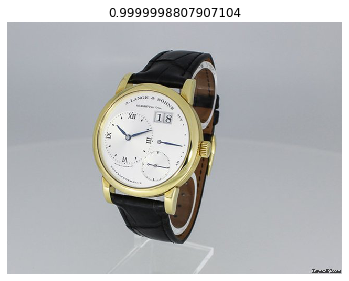

In [69]:
# shows images with visible dial and puts probability as title
idx = int(3e3)
df_visible = df[df['dial_visibility'] == 1]
name = data_path/df_visible.iloc[idx]['name']
pred = df_visible.iloc[idx]['dial_visibility_p_1']
img = open_image(name)
img.show(figsize=(6,6), title=str(pred))


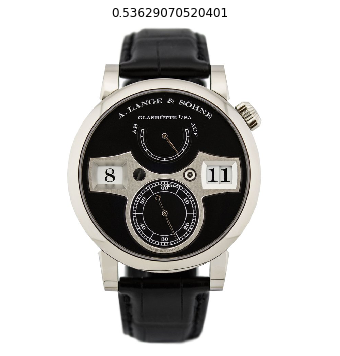

In [75]:
# shows images with invisible dial and puts probability as title
idx = int(3e3)
df_invisible = df[df['dial_visibility'] == 0]
name = data_path/df_invisible.iloc[idx]['name']
pred = df_invisible.iloc[idx]['dial_visibility_p_0']
img = open_image(name)
img.show(figsize=(6,6), title=str(pred))

In [92]:
df_most_uncertain = df_invisible[df_invisible['dial_visibility_p_0'] < 0.55]
df_most_uncertain.shape


(4807, 7)

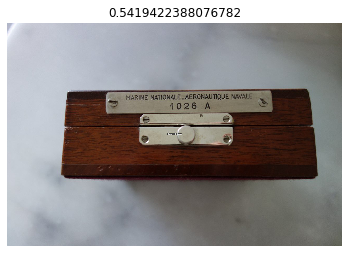

In [102]:
idx = int(888)
name = data_path/df_most_uncertain.iloc[idx]['name']
pred = df_most_uncertain.iloc[idx]['dial_visibility_p_0']
img = open_image(name)
img.show(figsize=(6,6), title=str(pred))

## **Most uncertain**

In [30]:
treshold = 0.55
df_most_uncertain = df[(df['dial_visibility_p_0'] < treshold) & (df['dial_visibility_p_1'] < treshold)]
df_most_uncertain.shape

(9281, 7)

In [31]:
 df_most_uncertain.head(10)

,name,dial_visibility,dial_visibility_p_0,dial_visibility_p_1,like,like_p_0,like_p_1
97,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.473409,0.526591,-1,-1,-1
173,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.480346,0.519654,-1,-1,-1
215,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.471942,0.528058,-1,-1,-1
218,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.477966,0.522034,-1,-1,-1
221,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.471942,0.528058,-1,-1,-1
224,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.477966,0.522034,-1,-1,-1
703,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,1,0.480377,0.519623,-1,-1,-1
895,a._lange_&_soehne_1/a._lange_&_soehne/1815/a._...,0,0.507462,0.492538,-1,-1,-1
1380,a._lange_&_soehne_1/a._lange_&_soehne/_without...,0,0.548590,0.451410,-1,-1,-1
1381,a._lange_&_soehne_1/a._lange_&_soehne/_without...,0,0.530430,0.469570,-1,-1,-1
